# Code for HW2 APM598
- Author: Jieshu Wang (jwang490@asu.edu)
- Feb 2020
- Two-layer linear neural networks and CNN (Convolutional Neural Networks)
- need to import HW2_util.py

## Ex 1. a) Two-layer NN with four data points

In [3]:
# 1. Two-layers Neural Networks
# ex1. a) find parameters that satisfies the four data points. 
from torch.utils.data import TensorDataset
import torch
from HW2_util import ModuleParams as MyParams, TwoLayerReluModel as LinearModel, MyNNTrainer as MyTrainer

training_data_x_ex1a = [[1,0],
                        [-1,0],
                        [0,1],
                        [0,-1]]
training_data_y_ex1a = [0,0,1,1]
training_data_ex1a = TensorDataset(torch.as_tensor(training_data_x_ex1a, dtype=float),
                              torch.as_tensor(training_data_y_ex1a, dtype=torch.long))

ex1a_params = MyParams(learning_rate=0.01, batch_size=4, optimizer='SDG', 
                       num_epoch=300, good_parameter_threshold=0.9)

ex1a_model = MyTrainer(LinearModel, ex1a_params, training_data_ex1a)
ex1a_df = ex1a_model.result

-- epoch 0 --
    loss: 0.7832
    accuracy: 0.2500
-- epoch 60 --
    loss: 0.6760
    accuracy: 0.7500
-- epoch 120 --
    loss: 0.5623
    accuracy: 0.7500
-- epoch 180 --
    loss: 0.4056
    accuracy: 0.7500
-- epoch 240 --
    loss: 0.2785
    accuracy: 1.0000
300 trainings is finished! Spent time 0.509850263595581 seconds.
Final training loss: 0.1817
Final training accuracy: 1.0000


## Ex 1. a) continue:
- Plot the loss and accuracy
- Print the good parameters that perform at least 90% accurate

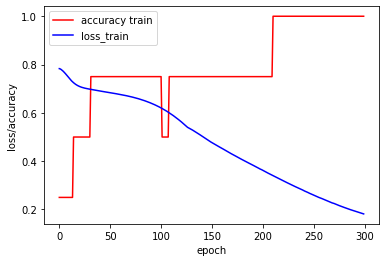


 The parameters that perform with (at least) 90.0% accuracy are:

epoch 210.0: (accuracy, loss): (1.0000, 0.3401)
    tensor([-2.3796e+00,  5.0224e-04], grad_fn=<SelectBackward>)
    -0.0047014253214001656
    tensor([ 1.0770, -1.2978], grad_fn=<SelectBackward>)
    -0.013317445293068886

epoch 211.0: (accuracy, loss): (1.0000, 0.3380)
    tensor([-2.3796e+00,  5.0224e-04], grad_fn=<SelectBackward>)
    -0.0047014253214001656
    tensor([ 1.0770, -1.2978], grad_fn=<SelectBackward>)
    -0.013317445293068886

epoch 212.0: (accuracy, loss): (1.0000, 0.3359)
    tensor([-2.3796e+00,  5.0224e-04], grad_fn=<SelectBackward>)
    -0.0047014253214001656
    tensor([ 1.0770, -1.2978], grad_fn=<SelectBackward>)
    -0.013317445293068886

epoch 213.0: (accuracy, loss): (1.0000, 0.3336)
    tensor([-2.3796e+00,  5.0224e-04], grad_fn=<SelectBackward>)
    -0.0047014253214001656
    tensor([ 1.0770, -1.2978], grad_fn=<SelectBackward>)
    -0.013317445293068886

epoch 214.0: (accuracy, loss): (1.000

In [5]:
# ex1. a) continue
# plot the loss and accuracy 
from HW2_util import plot_loss_accuracy, print_good_parameters

plot_loss_accuracy(ex1a_df, include_test=False)
print_good_parameters(ex1a_df, ex1a_params)

## Ex 1. b) Two-layer NN with many data points

In [7]:
# ex1. b) provide accuracy of the two-layer nn for the dataset

import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

training_df_ex1b = pd.read_csv('./data/data_HW2_ex1.csv')
X = np.column_stack((training_df_ex1b['x1'].values, training_df_ex1b['x2'].values))
y = training_df_ex1b['class'].values - 1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
training_set = TensorDataset(torch.as_tensor(x_train, dtype=float), torch.as_tensor(y_train, dtype=torch.long))
test_set = TensorDataset(torch.as_tensor(x_test, dtype=float), torch.as_tensor(y_test, dtype=torch.long))

ex1b_params = MyParams(learning_rate=0.01, batch_size=10, optimizer='SDG', num_epoch=200, good_parameter_threshold=0.9)
ex1b_trainer = MyTrainer(LinearModel, ex1b_params, training_set, test_set)
ex1b_df = ex1b_trainer.result

-- epoch 0 --
    loss (train, test): 0.6875, 0.6974
    accuracy (train, test): 0.5062, 0.5250
-- epoch 40 --
    loss (train, test): 0.1973, 0.1846
    accuracy (train, test): 0.9187, 0.9250
-- epoch 80 --
    loss (train, test): 0.1876, 0.1799
    accuracy (train, test): 0.9125, 0.9250
-- epoch 120 --
    loss (train, test): 0.1843, 0.1853
    accuracy (train, test): 0.9187, 0.9250
-- epoch 160 --
    loss (train, test): 0.1821, 0.1868
    accuracy (train, test): 0.9187, 0.9250
200 trainings is finished! Spent time 1.9429888725280762 seconds.
Final loss (train, test): 0.1830, 0.1913
Final accuracy (train, test): 0.9187, 0.9250


## Ex 1. b) continue:
- Plot the loss and accuracy
- Print the good parameters that perform at least 90% accurate

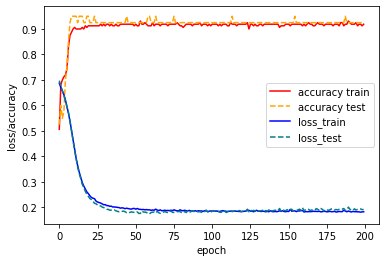


 The parameters that perform with (at least) 90.0% accuracy are:

epoch 9.0: (accuracy, loss): (0.9000, 0.4640)
    tensor([-0.2580,  2.4542], grad_fn=<SelectBackward>)
    -0.02574341744184494
    tensor([1.9756, 1.1101], grad_fn=<SelectBackward>)
    -1.8388899564743042

epoch 10.0: (accuracy, loss): (0.9062, 0.4281)
    tensor([-0.2580,  2.4542], grad_fn=<SelectBackward>)
    -0.02574341744184494
    tensor([1.9756, 1.1101], grad_fn=<SelectBackward>)
    -1.8388899564743042

epoch 11.0: (accuracy, loss): (0.9000, 0.3938)
    tensor([-0.2580,  2.4542], grad_fn=<SelectBackward>)
    -0.02574341744184494
    tensor([1.9756, 1.1101], grad_fn=<SelectBackward>)
    -1.8388899564743042

epoch 12.0: (accuracy, loss): (0.9000, 0.3645)
    tensor([-0.2580,  2.4542], grad_fn=<SelectBackward>)
    -0.02574341744184494
    tensor([1.9756, 1.1101], grad_fn=<SelectBackward>)
    -1.8388899564743042

epoch 13.0: (accuracy, loss): (0.9000, 0.3391)
    tensor([-0.2580,  2.4542], grad_fn=<SelectBackw

In [8]:
# ex1. b) continue, plot and print the results

plot_loss_accuracy(ex1b_df, include_test=True)
print_good_parameters(ex1b_df, ex1b_params)

## Ex 3. CNN with Fashion-MNIST dataset
- the best accuracy on test set is ___0.9726___

In [9]:
# ex3. CNN
from torchvision import datasets
import torchvision.transforms as transforms
from HW2_util import CNNNet as MyCNN

MNIST_training_set = datasets.MNIST('./data/HW2/data_sets', train=True, download=True, transform=transforms.ToTensor())
MNIST_test_set = datasets.MNIST('./data/HW2/data_sets', train=False, download=True, transform=transforms.ToTensor())

my_parameters = MyParams(drop_out_rate=0.2, num_epoch=5, learning_rate=0.00015)
cnn_trainer = MyTrainer(MyCNN, my_parameters, MNIST_training_set, MNIST_test_set)
cnn_df = cnn_trainer.result

-- epoch 0 --
    loss (train, test): 0.5795, 0.2869
    accuracy (train, test): 0.8300, 0.9180
-- epoch 1 --
    loss (train, test): 0.2766, 0.1865
    accuracy (train, test): 0.9189, 0.9457
-- epoch 2 --
    loss (train, test): 0.1965, 0.1367
    accuracy (train, test): 0.9422, 0.9611
-- epoch 3 --
    loss (train, test): 0.1540, 0.1053
    accuracy (train, test): 0.9537, 0.9680
-- epoch 4 --
    loss (train, test): 0.1281, 0.0869
    accuracy (train, test): 0.9615, 0.9726
5 trainings is finished! Spent time 83.955983877182 seconds.
Final loss (train, test): 0.1281, 0.0869
Final accuracy (train, test): 0.9615, 0.9726


## Ex 3. continue:
- Plot the loss and accuracy

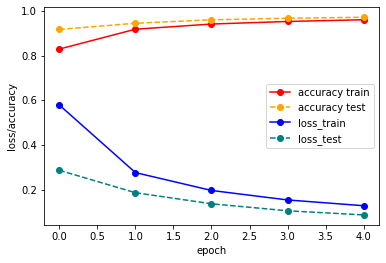

In [10]:
# ex3. continue, plot the results
plot_loss_accuracy(cnn_df, marker='o', include_test=True)
